In [3]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree,ensemble
from matplotlib.colors import LogNorm
import xarray as xr
import time
# my own 'library' below
####################
import sys
# my own 'library' below
src_path='../src/'
sys.path.append(src_path)
####################
import cf_tree_regression as cft
from importlib import reload

In [2]:
from jupyterthemes import jtplot
# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()
jtplot.style(theme='chesterish')

- ### decision tree regression

In [10]:
 # DEFAULT PARAMETERS - global variables
curdir='/home/igor/UNI/Master_Project/Script/Data/'
fname='ncr_pdf_douze_025deg.nc'
goal_var = 'cl_l'
input_vars = ['qsm', 'qtm', 'qlm', 'skew_l', 'var_l', 'var_t', 'tm', 'pm']
add_vars = ['qvlm','qsm']
eval_fraction=0.6
regtype = 'decision_tree'
# ['decision_tree','gradient boost','random forest']
max_depth_in=None

In [5]:
!ls '/home/igor/UNI/Master_Project/Script/Data'

125skew.nc		   ncr_pdf_douze_0125deg.nc  range.nc
cl_l.nc			   ncr_pdf_douze_025deg.nc   README_on_douze_files.txt
files.txt		   ncr_pdf_douze_05deg.nc    skew_l
ncr_pdf_douze_00625deg.nc  ncr_pdf_douze_1deg.nc


In [22]:
%debug?

In [21]:
# make sure that changes in module are applied in j notebook
reload(cft)

# DATA PREPROCESSING
prepro=cft.DataPrepro(curdir,fname,goal_var,input_vars,add_vars,eval_fraction)
# methods should be in this particular order!!
processed_data = prepro.get_processed_data()

In [10]:
# REGRESSION
goalvar_pred, goalvar_eval = cft.regression(regtype,processed_data,max_depth_in)

In [11]:
??cft.regression

/home/igor/UNI/Master Project/Script/MSC_repo/tree_regression/cf_tree_regression.py:220: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im=ax.hist2d(goalvar_eval, goalvar_pred, bins=100, norm=LogNorm(),cmap=plt.cm.jet, vmax=1000)


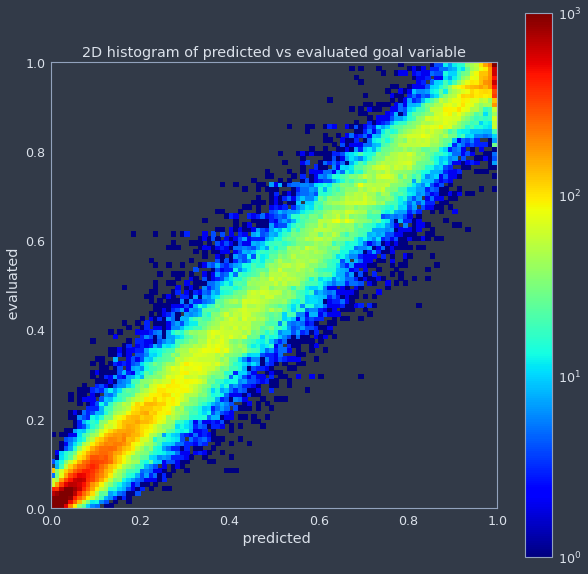

In [6]:
# VISUALISATION
# colormap of lognormalized due to high values range.
# empty regions correspond to log(0)=-inf
reload(cft)
cft.hist_plot(goalvar_pred, goalvar_eval)

- ### decision tree regression without additional varibles

In [47]:
 # DEFAULT PARAMETERS - global variables
curdir='/home/igor/UNI/Master Project/Script/Data/'
fname='ncr_pdf_douze_0125deg.nc'
goal_var = 'cl_l'
input_vars = ['qsm', 'qtm', 'qlm', 'skew_l', 'var_l', 'var_t', 'tm', 'pm']
# add_vars = ['qvlm','qsm']
add_vars = []
eval_fraction=0.6
regtype = 'decision_tree'
# ['decision_tree','gradient boost','random forest']
max_depth_in=None

In [41]:
# make sure that changes in module are applied in j notebook
reload(cft)

# DATA PREPROCESSING
prepro=cft.DataPrepro(curdir,fname,goal_var,input_vars,add_vars,eval_fraction)
# methods should be in this particular order!!
processed_data = prepro.get_processed_data()

/home/igor/UNI/Master Project/Script/MSC_repo/tree_regression/cf_tree_regression.py:96: UserWarning: Missing values in skew_l field were masked!
  warnings.warn("Missing values in {} field were masked!".format(var))


In [45]:
# REGRESSION
goalvar_pred, goalvar_eval = cft.regression(regtype,processed_data,max_depth_in)

/home/igor/UNI/Master Project/Script/MSC_repo/tree_regression/cf_tree_regression.py:222: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.set_title('2D histogram of predicted vs evaluated goal variable')


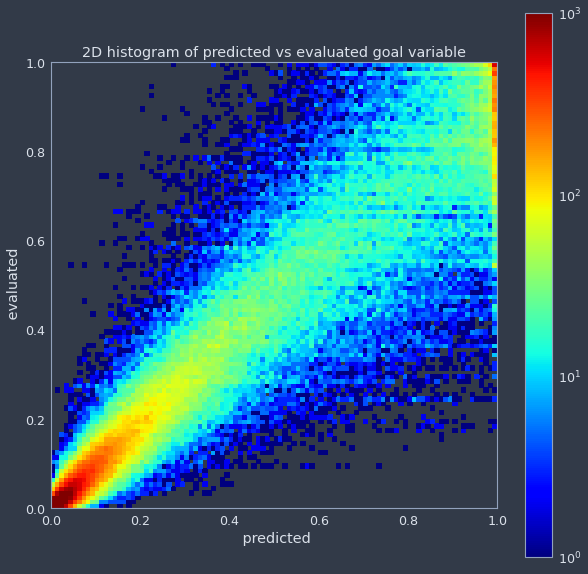

In [46]:
# VISUALISATION
# colormap of lognormalized due to high values range.
# empty regions correspond to log(0)=-inf
reload(cft)
cft.hist_plot(goalvar_pred, goalvar_eval)

- ### Random forest regression max_depth_in=40

In [28]:
 # DEFAULT PARAMETERS - global variables
curdir='/home/igor/UNI/Master Project/Script/Data/'
fname='ncr_pdf_douze_0125deg.nc'
goal_var = 'cl_l'
input_vars = ['qsm', 'qtm', 'qlm', 'skew_l', 'var_l', 'var_t', 'tm', 'pm']
add_vars = ['qvlm','qsm']
eval_fraction=0.6
regtype = 'random forest'
max_depth_in=40

In [29]:
# make sure that changes in module are applied in j notebook
reload(cft)

# DATA PREPROCESSING
prepro=cft.DataPrepro(curdir,fname,goal_var,input_vars,add_vars,eval_fraction)
# methods should be in this particular order!!
processed_data = prepro.get_processed_data()

/home/igor/UNI/Master Project/Script/MSC_repo/tree_regression/cf_tree_regression.py:96: UserWarning: Missing values in skew_l field were masked!
  warnings.warn("Missing values in {} field were masked!".format(var))


In [30]:
# REGRESSION
goalvar_pred, goalvar_eval = cft.regression(regtype,processed_data,max_depth_in)

/home/igor/UNI/Master Project/Script/MSC_repo/tree_regression/cf_tree_regression.py:222: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.set_title('2D histogram of predicted vs evaluated goal variable')


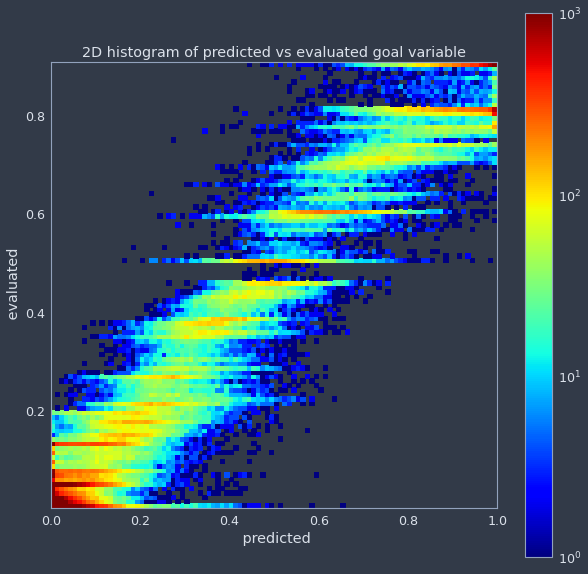

In [31]:
# VISUALISATION
# colormap of lognormalized due to high values range.
# empty regions correspond to log(0)=-inf
reload(cft)
cft.hist_plot(goalvar_pred, goalvar_eval)

- ### Random forest regression max_depth_in=None

In [48]:
 # DEFAULT PARAMETERS - global variables
curdir='/home/igor/UNI/Master Project/Script/Data/'
fname='ncr_pdf_douze_0125deg.nc'
goal_var = 'cl_l'
input_vars = ['qsm', 'qtm', 'qlm', 'skew_l', 'var_l', 'var_t', 'tm', 'pm']
add_vars = ['qvlm','qsm']
eval_fraction=0.6
regtype = 'random forest'
max_depth_in=None

In [52]:
# make sure that changes in module are applied in j notebook
reload(cft)

# DATA PREPROCESSING
prepro=cft.DataPrepro(curdir,fname,goal_var,input_vars,add_vars,eval_fraction)
# methods should be in this particular order!!
processed_data = prepro.get_processed_data()

/home/igor/UNI/Master Project/Script/MSC_repo/tree_regression/cf_tree_regression.py:96: UserWarning: Missing values in skew_l field were masked!
  warnings.warn("Missing values in {} field were masked!".format(var))


In [53]:
cft.regression??

In [ ]:
# REGRESSION
goalvar_pred, goalvar_eval = cft.regression(regtype,processed_data,max_depth_in)

/home/igor/UNI/Master Project/Script/MSC_repo/tree_regression/cf_tree_regression.py:222: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.set_title('2D histogram of predicted vs evaluated goal variable')


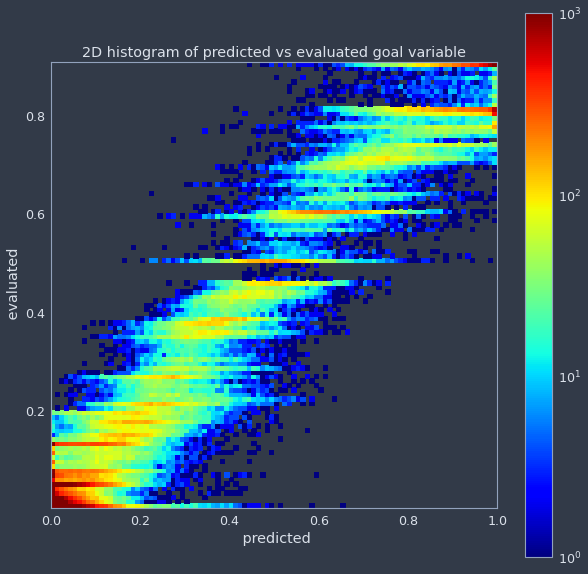

In [31]:
# VISUALISATION
# colormap of lognormalized due to high values range.
# empty regions correspond to log(0)=-inf
reload(cft)
cft.hist_plot(goalvar_pred, goalvar_eval)